In [47]:
%config IPCompleter.greedy=True

In [96]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# rng = numpy.random

def generate_dataset():
    x_batch = np.linspace(-1,1,101)#from -1 to 1 ,101 eleme
    y_batch = 2*x_batch + np.random.randn(*x_batch.shape)*0.3
    return x_batch,y_batch

def linear_regression():
    x = tf.placeholder(tf.float32,shape =(None),name = 'x')
    y = tf.placeholder(tf.float32,shape =(None),name = 'y')
    
    with tf.variable_scope('lreg',reuse=True) as scope:
        w = tf.Variable(np.random.normal(),name = 'W')
        b = tf.Variable(np.random.normal(),name = 'b')
        print('w',tf.get_variable('W',[1]))
        y_pred = tf.add(tf.multiply(w,x),b)
#         y_pred = tf.multiply(w,x)
        
        loss = tf.reduce_mean(tf.square(y_pred-y))
    return x,y,y_pred,loss,w,b
    

('w', <tf.Variable 'lreg/W:0' shape=(1,) dtype=float32_ref>)
('loss:', 7.0199785, -1.952672, 0.74278164)
('loss:', 5.9195123, -1.684587, 0.59643006)
('loss:', 5.0324826, -1.4347317, 0.47934878)
('loss:', 4.3060594, -1.2018666, 0.38568375)
('loss:', 3.7032769, -0.98483634, 0.31075171)
('loss:', 3.1977363, -0.78256416, 0.25080606)
('loss:', 2.7701654, -0.59404647, 0.20284957)
('loss:', 2.4061615, -0.41834801, 0.16448437)
('loss:', 2.0947104, -0.25459701, 0.13379219)
('loss:', 1.8272055, -0.10198107, 0.10923847)
('loss:', 1.5967824, 0.040256977, 0.089595482)
('loss:', 1.397872, 0.17282283, 0.073881097)
('loss:', 1.2258874, 0.2963742, 0.061309587)
('loss:', 1.0770056, 0.41152409, 0.051252387)
('loss:', 0.94800872, 0.51884377, 0.043206617)
('loss:', 0.83616686, 0.61886573, 0.036770005)
('loss:', 0.7391516, 0.7120862, 0.031620711)
('loss:', 0.65496695, 0.79896766, 0.027501281)
('loss:', 0.58189678, 0.87994117, 0.024205733)
('loss:', 0.51846123, 0.95540851, 0.021569295)


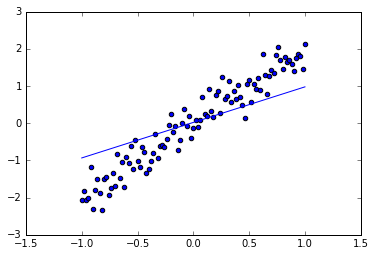

In [97]:
def run():
    x_batch,y_batch = generate_dataset()
    x,y,y_pred,loss,w,b = linear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)
        
        feed_dict = {x:x_batch,y:y_batch}
        
        for _ in range(20):
            loss_val,_,we,be = session.run([loss,optimizer,w,b],feed_dict)
            print('loss:',loss_val.mean(),we,be)
#             with tf.variable_scope('lreg',reuse=True) as scope:
#                 weight = tf.get_variable('W',[1])
#                 print('weight',tf.print(weight))
        
        y_pred = session.run(y_pred,{x:x_batch}) 
    
    plt.figure(1)
    plt.scatter(x_batch,y_batch)
    plt.plot(x_batch,y_pred)
    plt.show();
    
if __name__ == '__main__':
    run() 
    